# PHAS0102 - Assignment 1 (19002781)

In [1]:
# Importing appropirate modules
import numpy as np
import matplotlib.pylab as plt
import scipy
from timeit import timeit

## Part 1: a better function

In [2]:
def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    
    assert mat1.shape[1] == mat2.shape[0]
    
    result = []
    
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    
    return np.array(result).transpose()

In [3]:
# Testing slow matrix product
matrix1 = np.random.rand(3, 3)
matrix2 = np.random.rand(3, 3)
print(slow_matrix_product(matrix1, matrix2))
print(matrix1 @ matrix2)

[[0.68801184 1.17320489 0.57991183]
 [0.23454214 0.43487718 0.19990709]
 [0.63815698 1.62642093 0.93001354]]
[[0.68801184 1.17320489 0.57991183]
 [0.23454214 0.43487718 0.19990709]
 [0.63815698 1.62642093 0.93001354]]


In [4]:
def faster_matrix_product(mat1, mat2):
    """
    Multiplys two matrices mat1 @ mat2.
    
    Inputs:
    mat1 - Left-hand side matrix
    mat2 - Right-hand side matrix
    
    Output:
    mat3 - Product of mat1 & mat2
    
    """
    assert mat1.shape[1] == mat2.shape[0] # Ensures matrix multiplication is possible
    
    result = np.zeros((mat2.shape[0],mat1.shape[1]))
    
    for i in range(mat1.shape[1]):
        for j in range(mat2.shape[0]):
            value = np.dot(mat1[i],mat2[:,j])
            result[i,j] = value
                
    return result

### Checking faster_matrix_product

In [5]:
# Generating matrices for check
mat2_a = np.random.rand(2, 2)
mat2_b = np.random.rand(2, 2)

mat3_a = np.random.rand(3, 3)
mat3_b = np.random.rand(3, 3)

mat4_a = np.random.rand(4, 4)
mat4_b = np.random.rand(4, 4)

mat5_a = np.random.rand(5, 5)
mat5_b = np.random.rand(5, 5)

#### 2x2:

In [6]:
assert np.allclose(mat2_a @ mat2_b, faster_matrix_product(mat2_a, mat2_b))

#### 3x3:

In [7]:
assert np.allclose(mat3_a @ mat3_b, faster_matrix_product(mat3_a, mat3_b))

#### 4x4:

In [8]:
assert np.allclose(mat4_a @ mat4_b, faster_matrix_product(mat4_a, mat4_b))

#### 5x5:

In [9]:
assert np.allclose(mat5_a @ mat5_b, faster_matrix_product(mat5_a, mat5_b))

### Why is faster_matrix_product better than slow_matrix_product?

1) The numpy dot product is faster than individually multipling each row element.

2) The slow_matrix_product scales with N$^3$ matrix elements (3 nested loops), while faster_matrix_product only has 2 nested loops and scales between N$^2$ and N$^3$. Also, the faster function does not transpose the outputted matrix.

### Time Comparison

In [10]:
# Determine Sizes of Matrices for all subsequent tests
sizes = np.arange(10,1020,40)
print(sizes)

[  10   50   90  130  170  210  250  290  330  370  410  450  490  530
  570  610  650  690  730  770  810  850  890  930  970 1010]


In [11]:
# Timing slow and faster matrix product functions
slow_times = []
fast_times = []

for i in sizes:
    matrix_a = np.random.rand(i,i)
    matrix_b = np.random.rand(i,i)
    next_val_slow = timeit('slow_matrix_product(matrix_a,matrix_b)',globals=globals(),number=1)
    next_val_fast = timeit('faster_matrix_product(matrix_a,matrix_b)',globals=globals(),number=1)
    slow_times.append(next_val_slow) 
    fast_times.append(next_val_fast)

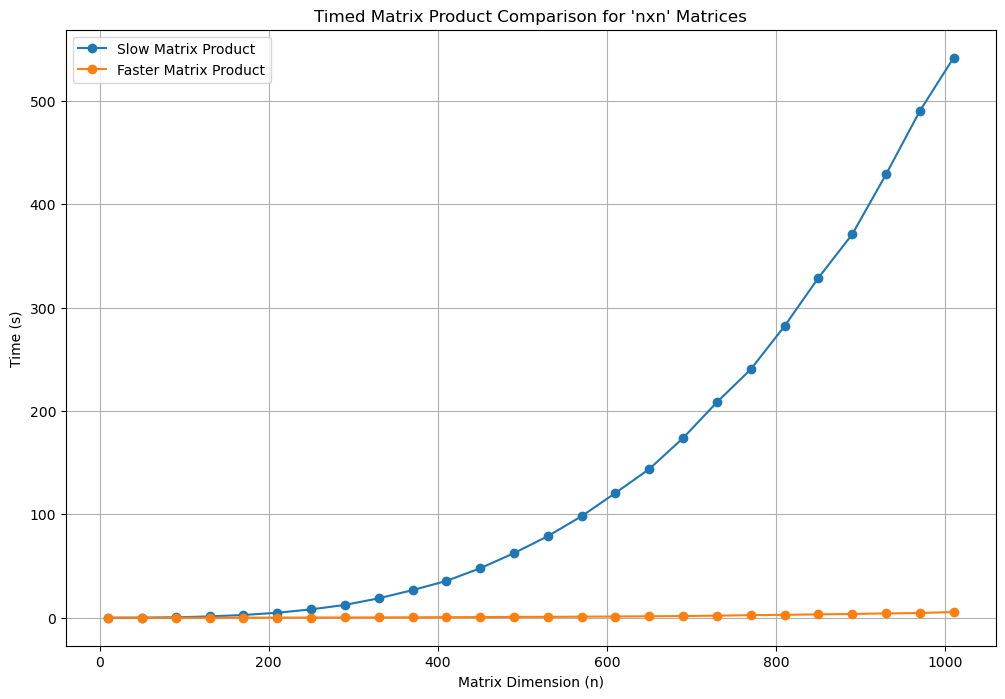

In [12]:
# Plotting run times of slow and faster matrix product functions
fig1 = plt.figure(figsize=(12,8))

ax1 = fig1.add_subplot(111)

ax1.plot(sizes,slow_times,'-o',label="Slow Matrix Product")
ax1.plot(sizes,fast_times,'-o',label="Faster Matrix Product")

ax1.set_title("Timed Matrix Product Comparison for 'nxn' Matrices")
ax1.set_xlabel("Matrix Dimension (n)")
ax1.set_ylabel("Time (s)")

plt.legend()
plt.grid()
plt.show()

## Part 2: speeding it up with Numba

In [22]:
# Importing numba
from numba import jit
import numba

In [23]:
@jit

def faster_matrix_product_jit(mat1, mat2):
    """
    Multiplys two matrices mat1 @ mat2 using @jit.
    
    Inputs:
    mat1 - Left-hand side matrix
    mat2 - Right-hand side matrix
    
    Output:
    mat3 - Product of mat1 & mat2
    
    """
    assert mat1.shape[1] == mat2.shape[0] # Ensures matrix multiplication is possible
    
    result = np.zeros((mat2.shape[0],mat1.shape[1]))
    
    for i in range(mat1.shape[1]):
        for j in range(mat2.shape[0]):
            value = np.dot(mat1[i],mat2[:,j])
            result[i,j] = value
                
    return result

In [24]:
@numba.njit

def faster_matrix_product_njit(mat1, mat2):
    """
    Multiplys two matrices mat1 @ mat2 using @njit.
    
    Inputs:
    mat1 - Left-hand side matrix
    mat2 - Right-hand side matrix
    
    Output:
    mat3 - Product of mat1 & mat2
    
    """
    assert mat1.shape[1] == mat2.shape[0] # Ensures matrix multiplication is possible
    
    result = np.zeros((mat2.shape[0],mat1.shape[1]))
    
    for i in range(mat1.shape[1]):
        for j in range(mat2.shape[0]):
            value = np.dot(mat1[i],mat2[:,j])
            result[i,j] = value
                
    return result

In [25]:
# Calling JIT and NJIT functions to skip slow first time compiling
matrix_a = np.random.rand(3,3)
matrix_b = np.random.rand(3,3)

test_time_jit = timeit('faster_matrix_product_jit(matrix_a,matrix_b)',globals=globals(),number=1)
test_time_njit = timeit('faster_matrix_product_njit(matrix_a,matrix_b)',globals=globals(),number=1)

In [26]:
# Timing numpy, faster, faster @jit and faster @njit matrix product functions
numpy_times = []
fast_times = []
fast_jit_times = []
fast_njit_times = []

for i in sizes:
    matrix_a = np.random.rand(i,i)
    matrix_b = np.random.rand(i,i)
    
    next_val_numpy = timeit('matrix_a @ matrix_b',globals=globals(),number=1)
    next_val_fast = timeit('faster_matrix_product(matrix_a,matrix_b)',globals=globals(),number=1)
    next_val_fast_jit = timeit('faster_matrix_product_jit(matrix_a,matrix_b)',globals=globals(),number=1)
    next_val_fast_njit = timeit('faster_matrix_product_jit(matrix_a,matrix_b)',globals=globals(),number=1)
    
    numpy_times.append(next_val_numpy) 
    fast_times.append(next_val_fast)
    fast_jit_times.append(next_val_fast_jit)
    fast_njit_times.append(next_val_fast_njit)

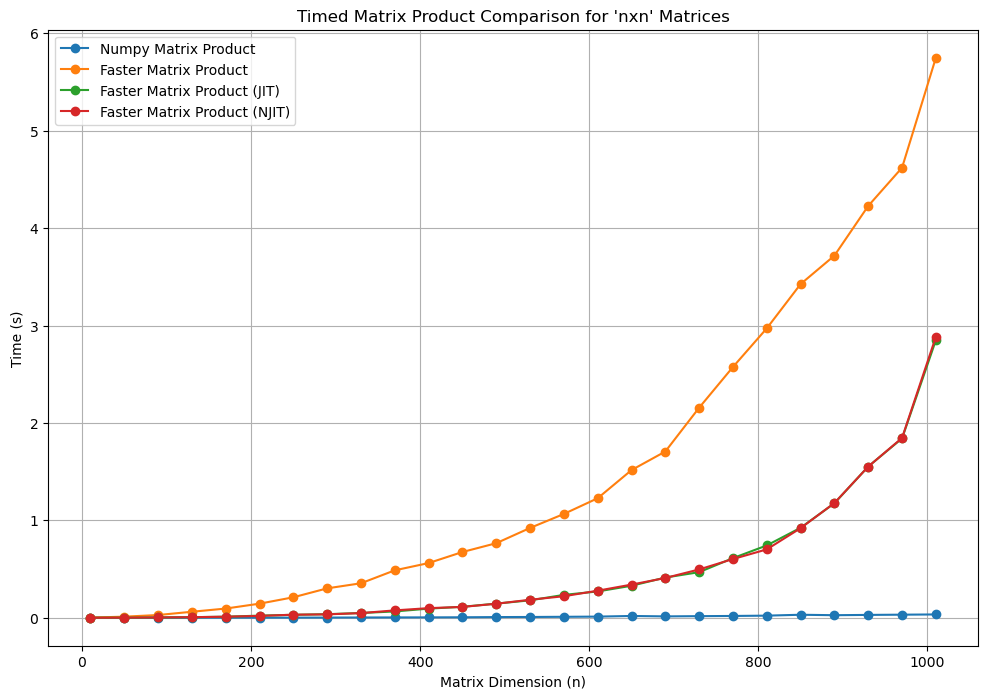

In [27]:
# Plotting times of numpy, faster, faster @jit and faster @njit matrix product functions
fig2 = plt.figure(figsize=(12,8))

ax1 = fig2.add_subplot(111)

ax1.plot(sizes,numpy_times,'-o',label="Numpy Matrix Product")
ax1.plot(sizes,fast_times,'-o',label="Faster Matrix Product")
ax1.plot(sizes,fast_jit_times,'-o',label="Faster Matrix Product (JIT)")
ax1.plot(sizes,fast_njit_times,'-o',label="Faster Matrix Product (NJIT)")

ax1.set_title("Timed Matrix Product Comparison for 'nxn' Matrices")
ax1.set_xlabel("Matrix Dimension (n)")
ax1.set_ylabel("Time (s)")

plt.legend()
plt.grid()
plt.show()

As the results for JIT and NJIT are approximately equal, I will to only use JIT for the rest of the assignment.

### Adjusting Data Layout

In [28]:
# Timing different data storage layout combinations (faster @jit function)
c_c_times_jit = []
c_f_times_jit = []
f_c_times_jit = []
f_f_times_jit = []

for i in sizes:
    matrix_A_c = np.random.rand(i,i)
    matrix_A_f = np.asfortranarray(matrix_A_c)
    matrix_B_c = np.random.rand(i,i)
    matrix_B_f = np.asfortranarray(matrix_B_c)
    
    next_val_c_c_jit = timeit('faster_matrix_product_jit(matrix_A_c,matrix_B_c)',globals=globals(),number=5)
    next_val_c_f_jit = timeit('faster_matrix_product_jit(matrix_A_c,matrix_B_f)',globals=globals(),number=5)
    next_val_f_c_jit = timeit('faster_matrix_product_jit(matrix_A_f,matrix_B_c)',globals=globals(),number=5)
    next_val_f_f_jit = timeit('faster_matrix_product_jit(matrix_A_f,matrix_B_f)',globals=globals(),number=5)
    
    c_c_times_jit.append(next_val_c_c_jit)
    c_f_times_jit.append(next_val_c_f_jit)
    f_c_times_jit.append(next_val_f_c_jit)
    f_f_times_jit.append(next_val_f_f_jit)

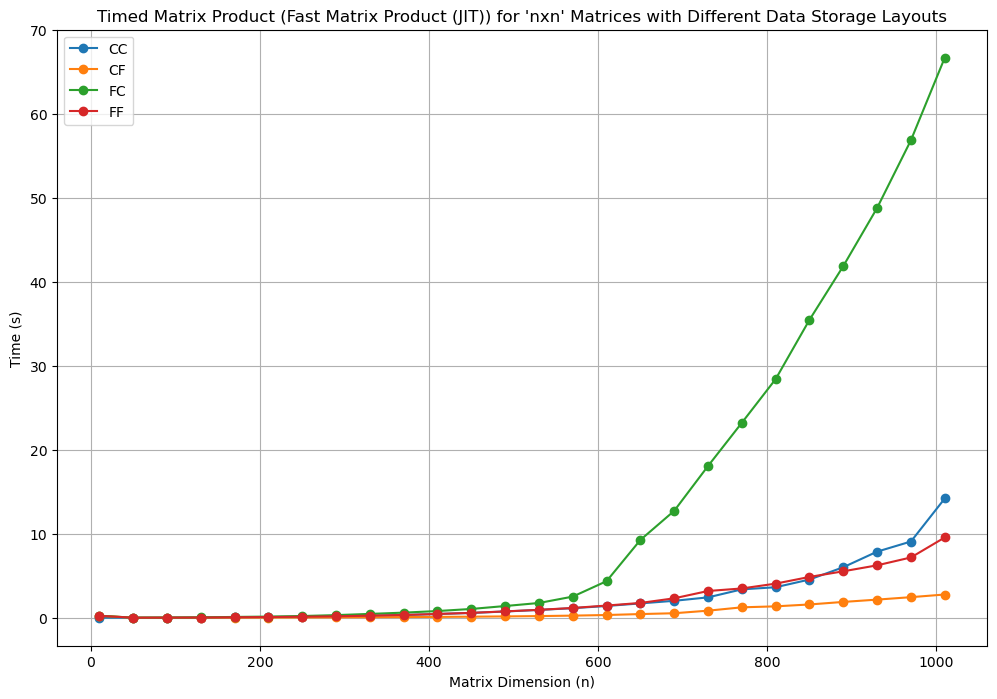

In [29]:
# Plotting run time of different data storage combinations
fig3 = plt.figure(figsize=(12,8))

ax1 = fig3.add_subplot(111)

ax1.plot(sizes,c_c_times_jit,'-o',label="CC")
ax1.plot(sizes,c_f_times_jit,'-o',label="CF")
ax1.plot(sizes,f_c_times_jit,'-o',label="FC")
ax1.plot(sizes,f_f_times_jit,'-o',label="FF")

ax1.set_title("Timed Matrix Product (Fast Matrix Product (JIT)) for 'nxn' Matrices with Different Data Storage Layouts")
ax1.set_xlabel("Matrix Dimension (n)")
ax1.set_ylabel("Time (s)")

plt.legend(loc='upper left')
plt.grid()
plt.show()

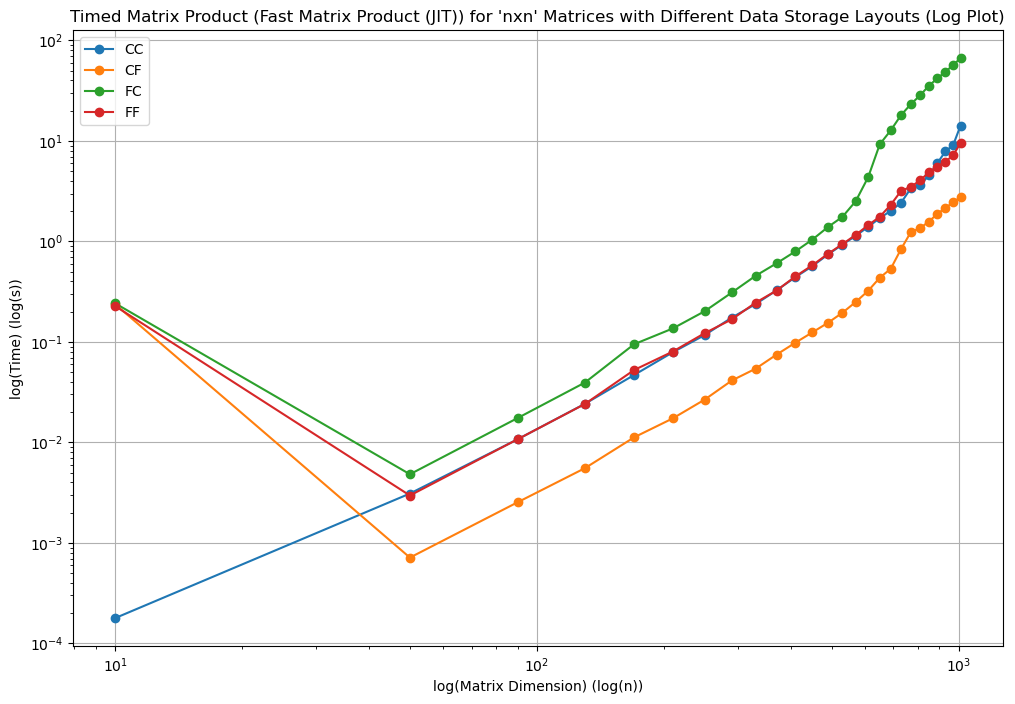

In [30]:
# Plotting log(run time) of different data storage combinations
fig4 = plt.figure(figsize=(12,8))

ax1 = fig4.add_subplot(111)

ax1.plot(sizes,c_c_times_jit,'-o',label="CC")
ax1.plot(sizes,c_f_times_jit,'-o',label="CF")
ax1.plot(sizes,f_c_times_jit,'-o',label="FC")
ax1.plot(sizes,f_f_times_jit,'-o',label="FF")

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_title("Timed Matrix Product (Fast Matrix Product (JIT)) for 'nxn' Matrices with Different Data Storage Layouts (Log Plot)")
ax1.set_xlabel("log(Matrix Dimension) (log(n))")
ax1.set_ylabel("log(Time) (log(s))")

plt.legend(loc='upper left')
plt.grid()
plt.show()

The C-style ordering (Matrix A) and Fortran-style (Matrix B) yields the fastest computation time. This is because the data is stored closer together:

A = np.array((1,2),(3,4));
B = np.array((5,6),(7,8))

This is important as matrix A's data is stored as: 1,2,3,4 while matrix B's data is stored as: 5,7,6,8. Therefore, when the dot product between the first row of A and the first column of B is calculated (1,2) & (5,7), both of the data sets have their appropirate values with equivalent byte addresses. Also, the log plot shows that the gradients are the same, which is expected as the functions are equivalent but the differences in log(run time) arise due to the various data layouts.